In [47]:
# Importing all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# Load dataset
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [49]:
df.shape

(1190, 12)

In [50]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [52]:
# Split features and target
X = df.drop(columns='target')
y = df['target']

In [53]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Feature scaling (for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Train models
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_preds = log_reg.predict(X_test_scaled)

In [56]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

In [57]:
# Evaluation - Accuracy
log_accuracy = accuracy_score(y_test, log_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

In [58]:
print(f"Logistic Regression Detection Accuracy: {log_accuracy * 100:.2f}%")
print(f"Random Forest Detection Accuracy: {rf_accuracy * 100:.2f}%")

Logistic Regression Detection Accuracy: 86.13%
Random Forest Detection Accuracy: 94.54%


In [59]:
# Evaluation - Classification Reports
log_report = classification_report(y_test, log_preds, output_dict=True)
rf_report = classification_report(y_test, rf_preds, output_dict=True)

In [60]:
# Visualization - Class 1 Metrics (heart disease)
metrics = ['precision', 'recall', 'f1-score']
log_values = [log_report['1'][m] for m in metrics]
rf_values = [rf_report['1'][m] for m in metrics]

In [61]:
x = np.arange(len(metrics))
width = 0.35

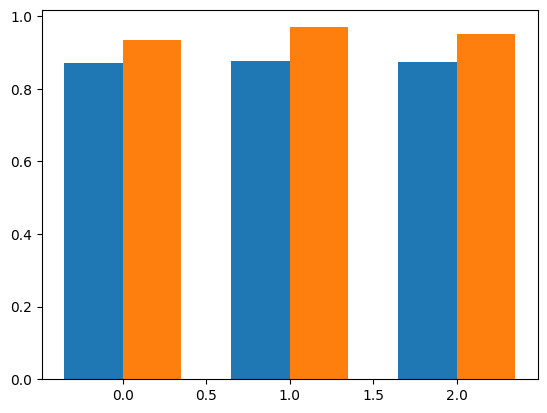

In [62]:
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, log_values, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest')

In [63]:
ax.set_ylabel('Score')
ax.set_title('Model Comparison (Class 1 - Heart Disease Present)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

In [64]:
# Add score labels to bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [65]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# X, y = your features and labels
model = RandomForestClassifier()
model.fit(X, y)

model = joblib.dump(model, 'heart_disease_model.pkl')
